<a href="https://colab.research.google.com/github/AlaaIraqy/FaceRecognition/blob/main/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content')
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 6.3MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=cc4030dc040b16fed3cb6b602cba2c4bfc8bdf8acc7812a625074141d815bdd5
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamed99ayman","key":"ae3067e356d2194f37db76ae8c3d45d4"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-05-03 13:54:12           4139        399  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2378        231  0.9375           
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            533         24  1.0              
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes            

In [ ]:
import os
os.chdir('/content')
! kaggle datasets download kasikrit/att-database-of-faces

  0% 0.00/3.61M [00:00<?, ?B/s]
100% 3.61M/3.61M [00:00<00:00, 217MB/s]


In [ ]:
 os.chdir('/content')
 ! mkdir ORL
 ! unzip att-database-of-faces.zip -d ORL


Archive:  att-database-of-faces.zip
  inflating: ORL/README              
  inflating: ORL/s1/1.pgm            
  inflating: ORL/s1/10.pgm           
  inflating: ORL/s1/2.pgm            
  inflating: ORL/s1/3.pgm            
  inflating: ORL/s1/4.pgm            
  inflating: ORL/s1/5.pgm            
  inflating: ORL/s1/6.pgm            
  inflating: ORL/s1/7.pgm            
  inflating: ORL/s1/8.pgm            
  inflating: ORL/s1/9.pgm            
  inflating: ORL/s10/1.pgm           
  inflating: ORL/s10/10.pgm          
  inflating: ORL/s10/2.pgm           
  inflating: ORL/s10/3.pgm           
  inflating: ORL/s10/4.pgm           
  inflating: ORL/s10/5.pgm           
  inflating: ORL/s10/6.pgm           
  inflating: ORL/s10/7.pgm           
  inflating: ORL/s10/8.pgm           
  inflating: ORL/s10/9.pgm           
  inflating: ORL/s11/1.pgm           
  inflating: ORL/s11/10.pgm          
  inflating: ORL/s11/2.pgm           
  inflating: ORL/s11/3.pgm           
  inflating: O

In [ ]:
import os
from skimage.io import imread
import numpy as np
os.chdir('/content/ORL')
directory = os.getcwd()
files=os.listdir(directory)
files.remove('README')
# files.remove('.ipynb_checkpoints')
# files.remove('kaggle.json')
files = sorted(files, key=lambda x: int(x[1:]))
Dataset=[]
y=[]
 
Y=0
 
for filename in files:
    Y+=1
    each_file=os.listdir(filename)
    each_file.sort()
    each_file = sorted(each_file, key=lambda x: int(x[:-4]))
    for image in each_file:
      img = imread(os.getcwd()+'/'+filename+'/'+image)
      Dataset.append(img.flatten())
      y.append(Y)
 
y=np.array(y)
Dataset=np.array(Dataset)

**Splitting the Dataset**

In [ ]:
train_X=Dataset[::2]
train_y=y[::2]
test_X=Dataset[1::2]
test_y=y[1::2]

# **Classification using PCA**

In [ ]:
means=np.mean(train_X,axis=0)
print(means)
cov=np.cov(train_X.T)
print(cov)
eigenVal,eigenVec=np.linalg.eigh(cov.T)



[86.115 86.265 86.685 ... 76.5   77.395 77.085]
[[1247.75052764 1243.70806533 1226.58917085 ...  -70.15829146
  -100.25670854  -44.10530151]
 [1243.70806533 1256.52741206 1233.22459799 ...  -81.94221106
  -111.05494975  -55.50002513]
 [1226.58917085 1233.22459799 1228.28721106 ...  -79.4798995
  -114.63374372  -67.99319095]
 ...
 [ -70.15829146  -81.94221106  -79.4798995  ... 1903.51758794
  1874.42964824 1690.99748744]
 [-100.25670854 -111.05494975 -114.63374372 ... 1874.42964824
  1980.13967337 1818.19238693]
 [ -44.10530151  -55.50002513  -67.99319095 ... 1690.99748744
  1818.19238693 1898.2289196 ]]


In [ ]:
#sort eigenValues and eigenvector from higher to lower
idx = eigenVal.argsort()[::-1]
eigenVal = eigenVal[idx]
eigenVec = eigenVec[:,idx]
print(eigenVal)


[ 2.90790760e+06  2.02738729e+06  1.15401195e+06 ... -1.19011138e-09
 -1.56761214e-09 -1.87864987e-09]


In [ ]:
#calcaluting r for each alpha 
alpha_arr=np.array([0.8,0.85,0.9,0.95])
r_peralpha=[]
for alpha in alpha_arr:
  r=0
  while(np.sum(eigenVal[0:r])/np.sum(eigenVal)-alpha<=1e-6):
    r+=1
  r_peralpha.append(r)
print(r_peralpha)





[36, 51, 76, 115]


In [ ]:
#calculating projected data for each alpha
from sklearn.neighbors import KNeighborsClassifier
accuracy=[]
neighbors=[1,3,5,7]
for r in r_peralpha:
  projected_train=np.dot(train_X,eigenVec[:,0:r])
  projected_test=np.dot(test_X,eigenVec[:,0:r])
  print()
  for neighbor_num in neighbors: 
    neigh = KNeighborsClassifier(n_neighbors=neighbor_num,weights = 'distance')
    neigh.fit(projected_train,train_y)
    accuracy.append(neigh.score(projected_test,test_y))

print(accuracy)
    








[0.95, 0.93, 0.93, 0.91, 0.95, 0.93, 0.915, 0.875, 0.94, 0.93, 0.905, 0.875, 0.94, 0.92, 0.895, 0.855]


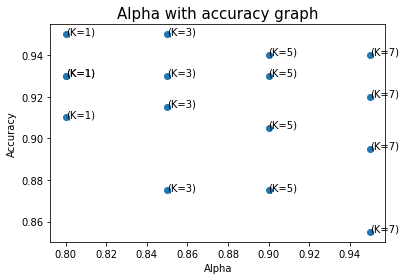

In [ ]:
import matplotlib.pyplot as plt
plt_alpha=[0.8,0.8,0.8,0.8,0.85,0.85,0.85,0.85,0.9,0.9,0.9,0.9,0.95,0.95,0.95,0.95]
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Alpha with accuracy graph",fontsize=15)
plt.scatter(plt_alpha,accuracy)
for i in range(len(accuracy)):
    label=("(K={})").format(neighbors[int(i/4)])
    plt.text(plt_alpha[i], accuracy[i],label)

plt.show()

#LDA

In [ ]:
D = np.array(train_X)
# for class_number in range(40):
#     # current_class = []
#     for img in range(5):
#         D.append(train_X[class_number*5 + img])
#     # D.append(current_class)

print('D', np.shape(D))

D (200, 10304)


In [ ]:
means = []
for current_class in range(40):
    class_range = 5*current_class
    means.append(np.mean(D[class_range:class_range+5], axis=0))
means = np.array(means)
print('Means', np.shape(means))
overall_mean = np.array([np.mean(train_X, axis=0)])
print('Overall mean', np.shape(overall_mean))

Means (40, 10304)
Overall mean (1, 10304)


In [ ]:
nk = 5
Sb = np.zeros((10304, 10304))
for mu in means:
    sub = mu - overall_mean
    Sb += nk*(np.dot(sub.T, sub))
print('Sb', np.shape(Sb))

Sb (10304, 10304)


In [ ]:
Z = []
for mu, current_class in zip(means, range(40)):
    class_range = current_class*5
    current_z = D[class_range:class_range+5] - np.ones((5,1))*mu
    Z.append(current_z)
Z = np.array(Z)
print(Z)

[[[  1.2  -2.4  -8.8 ...   9.4   8.2   7.4]
  [ -7.8  -7.4  -0.8 ...  -8.6 -11.8  -9.6]
  [ 17.2  24.6  26.2 ...  -2.6  -0.8   0.4]
  [ -5.8  -4.4  -6.8 ...  -2.6  -0.8  -0.6]
  [ -4.8 -10.4  -9.8 ...   4.4   5.2   2.4]]

 [[ -1.2   0.2   1.  ...  46.6  47.2  45.8]
  [ -6.2   1.2  -1.  ... -71.4 -72.8 -65.2]
  [ -1.2  -3.8   0.  ... -72.4 -71.8 -68.2]
  [  1.8  -0.8   0.  ...  40.6  42.2  43.8]
  [  6.8   3.2   0.  ...  56.6  55.2  43.8]]

 [[ -0.6  -2.   -0.4 ...  -3.2 -11.6  -4. ]
  [ -2.6  -1.   -2.4 ...  -1.2   0.4  -2. ]
  [ -2.6  -3.   -0.4 ...  -5.2  -3.6  -4. ]
  [  5.4   4.    3.6 ...   4.8   5.4   1. ]
  [  0.4   2.   -0.4 ...   4.8   9.4   9. ]]

 ...

 [[  2.8   2.8   6.6 ...  -1.    8.6   7.2]
  [ -3.2  -0.2  -2.4 ... -17.   -5.4  -7.8]
  [ -1.2  -0.2  -2.4 ...  11.   -6.4 -12.8]
  [ -0.2  -5.2  -3.4 ...   4.    2.6   6.2]
  [  1.8   2.8   1.6 ...   3.    0.6   7.2]]

 [[ -1.6  -1.2   0.2 ...   9.   14.6  11.2]
  [-10.6 -13.2  -7.8 ...   8.    3.6  -4.8]
  [  2.4   5.8   0

In [ ]:
S = np.zeros((10304,10304))
for z in Z:
    S += np.dot(z.T, z)
print(S)

[[26788.8 26876.2 25602.6 ...  2765.   1337.8  2004. ]
 [26876.2 29466.8 27233.2 ...  2085.6   488.4   805.8]
 [25602.6 27233.2 28124.  ...  3158.8   843.2  -231. ]
 ...
 [ 2765.   2085.6  3158.8 ... 80042.8 67178.8 44794.4]
 [ 1337.8   488.4   843.2 ... 67178.8 75098.4 55877.8]
 [ 2004.    805.8  -231.  ... 44794.4 55877.8 77690.4]]


In [ ]:
S_inv = np.linalg.inv(S)
print('S_inv', np.shape(S_inv))
A = np.dot(S_inv, Sb)
print(A)

S_inv (10304, 10304)
[[ 2.06612488e+16  2.12890119e+16  2.07115349e+16 ... -1.28429589e+15
  -1.35673565e+15 -2.79063291e+15]
 [-2.52987523e+16 -2.70086352e+16 -2.66481663e+16 ...  3.39589774e+16
   3.73127002e+16  4.76304187e+16]
 [ 9.64275010e+15  8.38548186e+15  9.32496348e+15 ...  2.27423936e+15
   1.06996476e+15  1.01549896e+16]
 ...
 [-1.26848391e+15 -1.12061020e+15 -1.22537181e+15 ... -1.59932693e+13
  -1.49541914e+14 -1.52699217e+15]
 [-4.72260798e+15 -4.85444688e+15 -4.74771807e+15 ... -1.07083171e+15
  -8.78263654e+14 -2.58815356e+13]
 [ 1.53074860e+13 -1.95494114e+14 -3.89395263e+13 ...  1.59093101e+15
   1.73496619e+15  3.22480447e+15]]


In [ ]:
eigen_values, eigen_vectors = np.linalg.eigh(A)
print('Eigen values', eigen_values)
print('Eigen vectors', eigen_vectors)

Eigen values [-1.91909478e+19 -1.54216445e+19 -8.44035158e+18 ...  8.40379115e+18
  1.56797293e+19  1.93319139e+19]
Eigen vectors [[ 0.01746449 -0.01041765  0.01485171 ... -0.01392619  0.01058705
  -0.0173771 ]
 [ 0.01760479 -0.01092636  0.01513322 ... -0.01404117  0.01104095
  -0.01743494]
 [ 0.01762653 -0.0106283   0.01473289 ... -0.01387956  0.01083349
  -0.01757997]
 ...
 [ 0.00912516  0.01625137  0.0044229  ...  0.00527573  0.01587971
   0.00890904]
 [ 0.00029196 -0.01008289  0.00782615 ...  0.00749582 -0.00997297
   0.00046716]
 [-0.00748389 -0.01904952 -0.00443128 ... -0.00543545 -0.018661
  -0.00719696]]


In [ ]:
# eigen_vectors = eigen_vectors.T
idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx]
print(eigen_values)

[ 1.93319139e+19  1.56797293e+19  8.40379115e+18 ... -8.44035158e+18
 -1.54216445e+19 -1.91909478e+19]


In [ ]:
dominant_eigen_vectors = eigen_vectors.T[:39,:] 
print('Dominant eigen vectors',dominant_eigen_vectors)

Dominant eigen vectors [[-0.0173771  -0.01743494 -0.01757997 ...  0.00890904  0.00046716
  -0.00719696]
 [ 0.01058705  0.01104095  0.01083349 ...  0.01587971 -0.00997297
  -0.018661  ]
 [-0.01392619 -0.01404117 -0.01387956 ...  0.00527573  0.00749582
  -0.00543545]
 ...
 [ 0.0331968   0.03143917  0.03467212 ... -0.00960561  0.01318281
   0.0081217 ]
 [-0.00093766 -0.00054173 -0.00078387 ...  0.00017397 -0.00585893
  -0.00296858]
 [ 0.01756377  0.01728738  0.01888958 ...  0.01306499 -0.01268392
  -0.00929378]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

 
neighbors=np.array([1,3,5,7])
accuracy=[]
projected_train=np.dot(train_X,dominant_eigen_vectors.T)
projected_test=np.dot(test_X,dominant_eigen_vectors.T)
for neighbor_num in neighbors: 
    print(f'neighbors = {neighbor_num}')
    neigh = KNeighborsClassifier(n_neighbors=neighbor_num)
    neigh.fit(projected_train,train_y)
    accuracy.append(neigh.score(projected_test,test_y))
    print(neigh.score(projected_test,test_y),'\n\n')

print('Accuracy', accuracy)

neighbors = 1
0.945 


neighbors = 3
0.885 


neighbors = 5
0.825 


neighbors = 7
0.81 


Accuracy [0.945, 0.885, 0.825, 0.81]


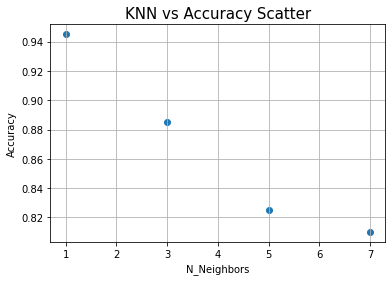

In [ ]:
plt.xlabel("N_Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN vs Accuracy Scatter",fontsize=15)
plt.grid()
plt.scatter(neighbors,accuracy)

# **Compare vs non-face images**

In [ ]:
 os.chdir('/content')
!kaggle datasets download -d prasunroy/natural-images

 98% 337M/342M [00:01<00:00, 233MB/s]
100% 342M/342M [00:01<00:00, 220MB/s]


In [ ]:
os.chdir('/content')
! mkdir non_faces
! unzip natural-images.zip -d /content/non_faces



In [ ]:
 pip install pillow

Preparing the non-face dataset

In [ ]:
import os
from skimage.io import imread
import numpy as np
from PIL import Image
import PIL
import glob
os.chdir('/content/non_faces/natural_images')
directory = os.getcwd()
files=os.listdir(directory)
files.remove('person')
files.sort()
no_face_dataset=[]
no_face_y=[]

class_id = -1
pictures_per_class = 600

for class_name in files:
    class_id += 1
    each_file=os.listdir(class_name)
    each_file.sort()
    count = pictures_per_class
    # if class_name == 'motorbike':
    #   count += 1
    for i in range(count):
      path = os.getcwd() + '/' + class_name + '/' + each_file[i]
      img = Image.open(path)
      resized_img = img.resize((92,112))
      img = resized_img.convert('L')
      ready_image = np.array(img)
      no_face_dataset.append(ready_image.flatten())
      no_face_y.append(class_id)

no_face_y = np.array(no_face_y)
no_face_dataset = np.array(no_face_dataset)
print(np.shape(no_face_dataset))

(4200, 10304)


Splitting faces and no faces dataset

In [ ]:
faces_and_nofaces = np.concatenate((Dataset, no_face_dataset))
print(np.shape(faces_and_nofaces))
labels_y = np.concatenate((np.ones(400),np.zeros(4200)), axis = 0)
train_X_ = faces_and_nofaces[0::2]
train_y_ = labels_y[0::2]
test_X_ = faces_and_nofaces[1::2]
test_y_ =labels_y[1::2]
print(np.shape(labels_y))
print(np.shape(no_face_dataset))

(4600, 10304)
(4600,)
(4200, 10304)


# Classification of faces vs no faces using **PCA**

In [ ]:
means_=np.mean(train_X_,axis=0)
print(means_)
cov_=np.cov(train_X_.T)
print(cov_)
eigenVal_,eigenVec_=np.linalg.eigh(cov_.T)

[127.1875 126.535  126.4475 ... 117.52   118.1925 118.1825]
[[5377.12014411 5322.01723058 5253.56751253 ... 3517.5764411
  3531.26707393 3587.53461779]
 [5322.01723058 5400.42984962 5352.67978697 ... 3483.73363409
  3502.52582707 3564.17780702]
 [5253.56751253 5352.67978697 5387.68144737 ... 3398.10756892
  3414.00887845 3477.08604637]
 ...
 [3517.5764411  3483.73363409 3398.10756892 ... 5740.47077694
  5686.51619048 5534.25323308]
 [3531.26707393 3502.52582707 3414.00887845 ... 5686.51619048
  5745.39392857 5622.68909148]
 [3587.53461779 3564.17780702 3477.08604637 ... 5534.25323308
  5622.68909148 5739.44781328]]


In [ ]:
#sort eigenValues and eigenvector from higher to lower
idx_ = eigenVal_.argsort()[::-1]
eigenVal_ = eigenVal_[idx_]
eigenVec_ = eigenVec_[:,idx_]
print(eigenVal_)

[ 1.25447411e+07  4.84744561e+06  2.81235002e+06 ... -4.07133153e-09
 -4.59083326e-09 -4.94040856e-09]


In [ ]:
#calcaluting r for each alpha 
alpha_arr_ = np.array([0.8,0.85,0.9,0.95])
r_peralpha_=[]
for alpha in alpha_arr_:
  r=0
  while(np.sum(eigenVal_[0:r])/np.sum(eigenVal_)-alpha<=1e-6):
    r+=1
  r_peralpha_.append(r)
print(r_peralpha_)


[35, 54, 88, 153]


In [ ]:
#calculating projected data for each alpha
from sklearn.neighbors import KNeighborsClassifier
accuracy_=[]
neighbors_=np.array([1])
for r in r_peralpha_:
  projected_train_ = np.dot(train_X_,eigenVec_[:,0:r])
  projected_test_ = np.dot(test_X_,eigenVec_[:,0:r])
  for neighbor_num in neighbors_: 
    neigh = KNeighborsClassifier(n_neighbors=neighbor_num,weights = 'distance')
    neigh.fit(projected_train_,train_y_)
    accuracy_.append(neigh.score(projected_test_,test_y_))

print(accuracy_)
    

[0.915, 0.895, 0.8825, 0.855]


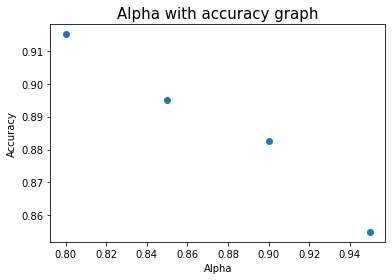

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Alpha with accuracy graph",fontsize=15)
plt.scatter(alpha_arr_,accuracy_)
plt.show()

# Classification of faces vs no faces using **LDA**

In [ ]:
samples_per_class = [25,50,100,200,300,400,500,600]

for j in samples_per_class:
  non_face_classes = []
  for i in range(0, 4200, 600):
    for k in range(i,i+j):
      non_face_classes.append(no_face_dataset[k])
print(np.shape(non_face_classes))

(4200, 10304)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# samples_per_class = [26,50,100,200,300,400,500,600]
# num_of_nonface = [100,200,400,600,1000,1500,2000,2500,3000,3500,4200]
samples_per_class = [600]
# num_of_nonface = [100,1000]
accuracy=[]
for run, spc in enumerate(samples_per_class):
  print(f'run number: {run+1}')
  non_face_classes = []  
  for i in range(0, 4200, 600):
    for k in range(i,i+spc):
      non_face_classes.append(no_face_dataset[k])
# for amount_of_nonfaces in num_of_nonface:
  print('non face classes', np.shape(non_face_classes))
  faces_and_nofaces = np.concatenate((Dataset, non_face_classes))
  print('totall',np.shape(faces_and_nofaces))
  labels_y = np.concatenate((np.ones(400),np.zeros(len(non_face_classes))), axis = 0)
  train_X_ = faces_and_nofaces[0::2]
  train_y_ = labels_y[0::2]
  test_X_ = faces_and_nofaces[1::2]
  test_y_ =labels_y[1::2]
  amount_of_nonfaces = len(non_face_classes)
  D_ = np.array(train_X_)
  D1 = D_[0:200]
  D2 = D_[200: (200+ amount_of_nonfaces//2)]
  print('D', np.shape(D_))
  means_ = []
  # for current_class in D_:
  means_.append(np.mean(D1, axis=0))
  means_.append(np.mean(D2, axis = 0))
  print('Means', np.shape(means_))
  overall_mean_ = np.array([np.mean(D_, axis=0)])
  print('Overall mean', np.shape(overall_mean_))
  print(means_)
  sub = np.subtract(means_[0] , means_[1])
  B = np.dot(sub.T, sub)
  print(np.shape(B))
  # sub = np.subtract(means_[:1] , means_[1:2])
  # B = np.dot(sub.T, sub)
  # print(np.shape(B))
  Z_ = []
  Z_.append(D1 - np.ones((200,1))*means_[0])
  Z_.append(D2 - np.ones(((amount_of_nonfaces//2),1))*means_[1])
  # for mu, Di in zip(means_, D_):
  #     current_z = Di - np.ones(((400+amount_of_nonfaces)/2,1))*mu
  #     Z_.append(current_z)
  Z_ = np.array(Z_)
  print('Z', np.shape(Z_))
  S_ = np.zeros((10304,10304))
  for z in Z_:
      S_ += np.dot(z.T, z)
  print('S', np.shape(S_))
  S_inv_ = np.linalg.inv(S_)
  print('S_inv', np.shape(S_inv_))
  A_ = np.dot(S_inv_, B)
  print('A', np.shape(A_))
  eigen_values_, eigen_vectors_ = np.linalg.eigh(A_)
  print('Eigen values', np.shape(eigen_values_))
  print('Eigen vectors', np.shape(eigen_vectors_))

  idx_ = np.argsort(eigen_values_)[::-1]
  eigen_values_ = eigen_values_[idx_]
  eigen_vectors_ = eigen_vectors_[:,idx_]
  eig_sum = sum(eigen_values_)
  print(eigen_values_)
  print(eig_sum)
  dominant_eigen_vectors_ = eigen_vectors_.T[:39,:] 
  print('Dominant eigen vectors', np.shape(dominant_eigen_vectors_))
  neighbors=np.array([1])
  projected_train=np.dot(train_X_,dominant_eigen_vectors_.T)
  projected_test=np.dot(test_X_,dominant_eigen_vectors_.T)
  for neighbor_num in neighbors: 
      print(f'neighbors = {neighbor_num}')
      neigh = KNeighborsClassifier(n_neighbors=neighbor_num)
      neigh.fit(projected_train,train_y_)
      acc = neigh.score(projected_test,test_y_)
      accuracy.append(acc)
      print(f'accuracy for {amount_of_nonfaces} non faces = {acc}')
      predicted_labels = neigh.predict(projected_test)

      # print(neigh.score(projected_test,test_y_),'\n\n')
      # testing_label = classifier.predict(projected_test)
      # print('testing label: ', testing_label)
# num_of_nonface = [182,350,700,1400,2100,2800,3500,4200]

print('projected_test', np.shape(projected_test))
print('predicted_labels',np.shape(predicted_labels))
print(predicted_labels)
print('test_y_',np.shape(test_y_))
print(test_y_)
print('Accuracy ', accuracy)
print('Amounts of non faces tested ', num_of_nonface)
# plt.plot(num_of_nonface, accuracy)
# plt.xlabel('number of non faces')
# plt.ylabel('Accuracy')

run number: 1
non face classes (4200, 10304)
totall (4600, 10304)
D (2300, 10304)
Means (2, 10304)
Overall mean (1, 10304)
[array([86.115, 86.265, 86.685, ..., 76.5  , 77.395, 77.085]), array([143.81238095, 143.90333333, 144.0347619 , ..., 144.64095238,
       145.72619048, 146.63095238])]
()
(10304, 10304)
Z (2,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


S (10304, 10304)
S_inv (10304, 10304)
A (10304, 10304)
Eigen values (10304,)
Eigen vectors (10304, 10304)
[ 1.63916893e+14  4.54990600e+13  2.94124361e+13 ... -2.93442257e+13
 -4.54706588e+13 -1.63888864e+14]
22464020017.15625
Dominant eigen vectors (39, 10304)
neighbors = 1
accuracy for 4200 non faces = 0.9695652173913043
projected_test (2300, 39)
predicted_labels (2300,)
[0. 1. 0. ... 0. 0. 0.]
test_y_ (2300,)
[1. 1. 1. ... 0. 0. 0.]
Accuracy  [0.9695652173913043]
Amounts of non faces tested  [182, 350, 700, 1400, 2100, 2800, 3500, 4200]


In [ ]:
success = []
failure = []
for i in range(len(predicted_labels)):
  if predicted_labels[i] != test_y_[i]:
    failure.append(i)
  else:
    success.append(i)
print(f'failure: {len(failure)}\n', failure)
print(f'success: {len(success)}\n', success)


failure: 70
 [0, 2, 4, 96, 97, 150, 236, 259, 518, 576, 589, 640, 646, 652, 654, 681, 696, 790, 824, 825, 830, 838, 850, 875, 909, 911, 918, 937, 960, 983, 988, 1029, 1048, 1070, 1081, 1088, 1128, 1157, 1200, 1227, 1243, 1256, 1295, 1319, 1346, 1422, 1434, 1448, 1453, 1482, 1487, 1488, 1491, 1502, 1506, 1557, 1564, 1569, 1585, 1591, 1595, 1618, 1626, 1632, 1648, 1657, 1676, 1680, 1683, 1696]
success: 2230
 [1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 1

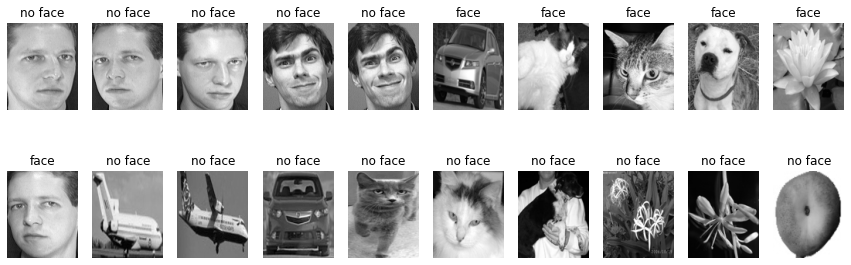

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np
from PIL import Image
import PIL
import glob
# x = np.array(test_X_[236])
# x = np.reshape(x,(112,92))
# print(x)
# img = Image.fromarray(x)

# failure: 70
#  [0, 2, 4, 96, 97, 150, 236, 259, 518, 576, 589, 640, 646, 652, 654, 681, 696, 790, 824, 825, 830, 838, 850, 875, 909, 911, 918, 937, 960, 983, 988, 1029, 1048, 1070, 1081, 1088, 1128, 1157, 1200, 1227, 1243, 1256, 1295, 1319, 1346, 1422, 1434, 1448, 1453, 1482, 1487, 1488, 1491, 1502, 1506, 1557, 1564, 1569, 1585, 1591, 1595, 1618, 1626, 1632, 1648, 1657, 1676, 1680, 1683, 1696]
# success: 2230
#  [1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 641, 642, 643, 644, 645, 647, 648, 649, 650, 651, 653, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 826, 827, 828, 829, 831, 832, 833, 834, 835, 836, 837, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 910, 912, 913, 914, 915, 916, 917, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 984, 985, 986, 987, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1082, 1083, 1084, 1085, 1086, 1087, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1449, 1450, 1451, 1452, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1483, 1484, 1485, 1486, 1489, 1490, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1503, 1504, 1505, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1558, 1559, 1560, 1561, 1562, 1563, 1565, 1566, 1567, 1568, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1586, 1587, 1588, 1589, 1590, 1592, 1593, 1594, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1627, 1628, 1629, 1630, 1631, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1677, 1678, 1679, 1681, 1682, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299]

fig = plt.figure(figsize =(15,5))
rows = 2
cols = 10
img_no = 1 
for i in range(0,5):
  fig.add_subplot(rows,cols,img_no)
  img_no += 1
  x = np.array(test_X_[failure[i]])
  x = np.reshape(x,(112,92))
  img = Image.fromarray(x)
  plt.imshow(img, cmap = 'gray')
  plt.axis('off')
  plt.title('face' if (predicted_labels[failure[i]] == 1) else 'no face')

for i in range(10,60,10):
  fig.add_subplot(rows,cols,img_no)
  img_no += 1
  x = np.array(test_X_[failure[i]])
  x = np.reshape(x,(112,92))
  img = Image.fromarray(x)
  plt.imshow(img, cmap = 'gray')
  plt.axis('off')
  plt.title('face' if (predicted_labels[failure[i]] == 1) else 'no face')


for i in range(0,2000,200):
  fig.add_subplot(rows,cols,img_no)
  img_no += 1
  x = np.array(test_X_[success[i]])
  x = np.reshape(x,(112,92))
  img = Image.fromarray(x)
  plt.imshow(img,cmap = 'gray')
  plt.axis('off')
  plt.title('face' if (predicted_labels[success[i]] == 1) else 'no face')
# plt.imshow(img,cmap='gray')

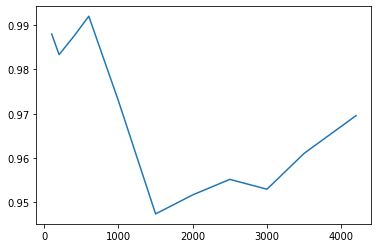

In [ ]:
import matplotlib.pyplot as plt
Accuracy = [0.9484536082474226, 0.928, 0.9345454545454546, 0.9511111111111111, 0.956, 0.956875, 0.9656410256410256, 0.9695652173913043]
num_of_nonface = [182,350,700,1400,2100,2800,3500,4200]

# Accuracy = [0.988, 0.9728571428571429]
# Amounts =[100, 1000]
# Accuracy =[0.988, 0.9833333333333333, 0.9875, 0.992, 0.9728571428571429, 0.9473684210526315, 0.9516666666666667, 0.9551724137931035, 0.9529411764705882, 0.961025641025641, 0.9695652173913043]
Amounts = [100, 200, 400, 600, 1000, 1500, 2000, 2500, 3000, 3500, 4200]
plt.plot(Amounts, Accuracy)

In [ ]:
D_ = []
for class_number in range(2):
    current_class = []
    for img in range(200):
        current_class.append(train_X_[class_number*200 + img])
    D_.append(current_class)
print('D', np.shape(D_))

D (400, 10304)


In [ ]:
means_ = []
for current_class in D_:
    means_.append(np.mean(current_class, axis=0))
print('Means', np.shape(means_))
overall_mean_ = np.array([np.mean(train_X_, axis=0)])
print('Overall mean', np.shape(overall_mean_))

Means (2, 10304)
Overall mean (1, 10304)


In [ ]:
sub = np.subtract(means_[:1] , means_[1:2])
B = np.dot(sub.T, sub)
print(B)
print(np.shape(B))

[[6747.801025 6615.9583   6532.581125 ... 6739.1758   6702.621275
  6751.908275]
 [6615.9583   6486.6916   6404.9435   ... 6607.5016   6571.6613
  6619.9853  ]
 [6532.581125 6404.9435   6324.225625 ... 6524.231    6488.842375
  6536.557375]
 ...
 [6739.1758   6607.5016   6524.231    ... 6730.5616   6694.0538
  6743.2778  ]
 [6702.621275 6571.6613   6488.842375 ... 6694.0538   6657.744025
  6706.701025]
 [6751.908275 6619.9853   6536.557375 ... 6743.2778   6706.701025
  6756.018025]]
(10304, 10304)


In [ ]:
Z_ = []
for mu, Di in zip(means_, D_):
    current_z = Di - np.ones((200,1))*mu
    Z_.append(current_z)
Z_ = np.array(Z_)
print('Z', np.shape(Z_))

Z (2, 200, 10304)


In [ ]:
S_ = np.zeros((10304,10304))
for z in Z_:
    S_ += np.dot(z.T, z)
print('S', np.shape(S_))

S (10304, 10304)


In [ ]:
S_inv_ = np.linalg.inv(S_)
print('S_inv', np.shape(S_inv_))
A_ = np.dot(S_inv_, B)
print('A', np.shape(A_))

S_inv (10304, 10304)
A (10304, 10304)


In [ ]:
eigen_values_, eigen_vectors_ = np.linalg.eigh(A_)
print('Eigen values', np.shape(eigen_values_))
print('Eigen vectors', np.shape(eigen_vectors_))

Eigen values (10304,)
Eigen vectors (10304, 10304)


In [ ]:
# eigen_vectors_ = eigen_vectors_.T
for i in range(len(eigen_values_)):
  eigen_values_[i] = abs(eigen_values_[i])

idx_ = np.argsort(eigen_values_)[::-1]
eigen_values_ = eigen_values_[idx_]
eigen_vectors_ = eigen_vectors_[:,idx_]
eig_sum = sum(eigen_values_)
cur_sum = 0
dominant_count = 0
while cur_sum <= 0.8:
  cur_sum += (eigen_values_[dominant_count]/ eig_sum)
  dominant_count += 1
dominant_count -= 1
print(eigen_values_)
print(cur_sum )
print(eig_sum)

[7.01850318e+16 7.00919178e+16 1.71850520e+16 ... 2.45170067e+08
 2.15323735e+08 2.91031767e+07]
0.8001074468320546
5.3941276790860806e+17


In [ ]:
print(eigen_values_)
dominant_eigen_vectors_ = eigen_vectors_.T[:dominant_count,:] 
print('Dominant eigen vectors', np.shape(dominant_eigen_vectors_))

[7.01850318e+16 7.00919178e+16 1.71850520e+16 ... 2.45170067e+08
 2.15323735e+08 2.91031767e+07]
Dominant eigen vectors (425, 10304)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

 
neighbors=np.array([1])
accuracy=[]
projected_train=np.dot(train_X_,dominant_eigen_vectors_.T)
projected_test=np.dot(test_X_,dominant_eigen_vectors_.T)
for neighbor_num in neighbors: 
  print(f'neighbors = {neighbor_num}')
  neigh = KNeighborsClassifier(n_neighbors=neighbor_num)
  neigh.fit(projected_train,train_y_)
  accuracy.append(neigh.score(projected_test,test_y_))
  predicted_labels = neigh.predict(projected_test)
  print(neigh.score(projected_test,test_y_),'\n\n')
    # testing_label = classifier.predict(projected_test)
    # print('testing label: ', testing_label)

print('projected_test', np.shape(projected_test))
print('predicted_labels',np.shape(predicted_labels))
print(predicted_labels)
print('test_y_',np.shape(test_y_))
print(test_y_)
print('Accuracy', accuracy)

neighbors = 1
0.9125 


neighbors = 3
0.895 


neighbors = 5
0.8725 


neighbors = 7
0.8725 


Accuracy [0.9125, 0.895, 0.8725, 0.8725]


# Bonus

In [ ]:
#splitting the data 70% 30%
i=0
j=7
end=10
tens = 0
trainX = []
testX = []
trainY = []
testY = []
for tens in range(40):
  while i<j:
    trainX.append(Dataset[i])
    trainY.append(y[i])
    i+=1
  while j<end:
    testX.append(Dataset[j])
    testY.append(y[j])
    j+=1
  i+=3
  j+=7
  end+=10
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)
print(np.shape(trainY))
print(np.shape(testY))
print(np.shape(testX))
print(np.shape(trainX))

(280,)
(120,)
(120, 10304)
(280, 10304)


In [ ]:
#recalling PCA
means=np.mean(trainX,axis=0)
print(means)
cov=np.cov(trainX.T)
eigenVal,eigenVec=np.linalg.eigh(cov.T)


[85.41071429 85.33928571 85.65357143 ... 74.75714286 74.16785714
 73.35714286]


In [ ]:
#sort eigenValues and eigenvector from higher to lower
idx = eigenVal.argsort()[::-1]
eigenVal = eigenVal[idx]
eigenVec = eigenVec[:,idx]
print(eigenVal)


[ 2.93703612e+06  2.04152935e+06  1.13584912e+06 ... -1.24575220e-09
 -1.60131921e-09 -1.75577523e-09]


In [ ]:
#calcaluting r for each alpha 
alpha_arr=np.array([0.8,0.85,0.9,0.95])
r_peralpha=[]
for alpha in alpha_arr:
  r=0
  while(np.sum(eigenVal[0:r])/np.sum(eigenVal)-alpha<=1e-6):
    r+=1
  r_peralpha.append(r)
print(r_peralpha)

[39, 57, 89, 145]


In [ ]:
#calculating projected data for each alpha
from sklearn.neighbors import KNeighborsClassifier
accuracy=[]
neighbors=np.array([1])
for r in r_peralpha:
  projected_train=np.dot(trainX,eigenVec[:,0:r])
  projected_test=np.dot(testX,eigenVec[:,0:r])
  print()
  for neighbor_num in neighbors: 
    neigh = KNeighborsClassifier(n_neighbors=neighbor_num,weights = 'distance')
    neigh.fit(projected_train,trainY)
    accuracy.append(neigh.score(projected_test,testY))
 
print(accuracy)





[0.9583333333333334, 0.9666666666666667, 0.9666666666666667, 0.95]


In [ ]:
#recalling LDA
D = []
for class_number in range(40):
    current_class = []
    for img in range(5):
        current_class.append(trainX[class_number*5 + img])
    D.append(current_class)
print('D', np.shape(D))

D (40, 5, 10304)


In [ ]:
means = []
for current_class in D:
    means.append(np.mean(current_class, axis=0))
print('Means', np.shape(means))
overall_mean = np.array([np.mean(trainX, axis=0)])
print('Overall mean', np.shape(overall_mean))

Means (40, 10304)
Overall mean (1, 10304)


In [ ]:
nk = 7
Sb = np.zeros((10304, 10304))
for mu in means:
    sub = mu - overall_mean
    Sb += nk*(np.dot(sub.T, sub))
print('Sb', np.shape(Sb))

Sb (10304, 10304)


In [ ]:
Z = []
for mu, Di in zip(means, D):
    current_z = Di - np.ones((5,1))*mu
    Z.append(current_z)
Z = np.array(Z)
print('Z', np.shape(Z))

Z (40, 5, 10304)


In [ ]:
S = np.zeros((10304,10304))
for z in Z:
    S += np.dot(z.T, z)
print('S', np.shape(S))

S (10304, 10304)


In [ ]:
S_inv = np.linalg.inv(S)
print('S_inv', np.shape(S_inv))
A = np.dot(S_inv, Sb)
print('A', np.shape(A))

S_inv (10304, 10304)
A (10304, 10304)


In [ ]:
eigen_values, eigen_vectors = np.linalg.eigh(A)
print('Eigen values', np.shape(eigen_values))
print('Eigen vectors', np.shape(eigen_vectors))

In [ ]:
# eigen_vectors = eigen_vectors.T
idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx]

In [ ]:
dominant_eigen_vectors = eigen_vectors.T[:39,:] 
print('Dominant eigen vectors', np.shape(dominant_eigen_vectors))

Dominant eigen vectors (39, 10304)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

 
neighbors=np.array([1,3,5,7])
accuracy=[]
projected_train=np.dot(trainX,dominant_eigen_vectors.T)
projected_test=np.dot(testX,dominant_eigen_vectors.T)
for neighbor_num in neighbors: 
    print(f'neighbors = {neighbor_num}')
    neigh = KNeighborsClassifier(n_neighbors=neighbor_num)
    neigh.fit(projected_train,trainY)
    accuracy.append(neigh.score(projected_test,testY))
    print(neigh.score(projected_test,testY),'\n\n')
    # testing_label = classifier.predict(projected_test)
    # print('testing label: ', testing_label)
print('Accuracy', accuracy)

neighbors = 1
0.95 


neighbors = 3
0.9166666666666666 


neighbors = 5
0.8583333333333333 


neighbors = 7
0.8083333333333333 


Accuracy [0.95, 0.9166666666666666, 0.8583333333333333, 0.8083333333333333]
